In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import differential_evolution


$$
x = \left( t \cos(\theta) - e^{M|t|} \sin(0.3t)\sin(\theta) + X \right)
$$

$$
y = \left (42 + t*\sin(\theta)+e^{M\left|t\right|}\cdot\sin(0.3t)\cos(\theta)\right)
$$


$$
0 \deg<\theta<50 \deg \\
-0.05<M<0.05 \\
0<X<100\\
6<t<60
$$

In [3]:
df = pd.read_csv("xy_data.csv")
x = df["x"]
y = df["y"]
t = np.linspace(6.0, 60.0, len(x))
print(f"x: {x.dtypes},y: {y.dtypes},\n{df.head()}\n{df.shape}")

x: float64,y: float64,
            x          y
0   88.364456  57.784378
1   74.283936  54.406780
2   60.256474  46.311462
3   82.134370  57.717567
4  101.036390  67.849340
(1500, 2)


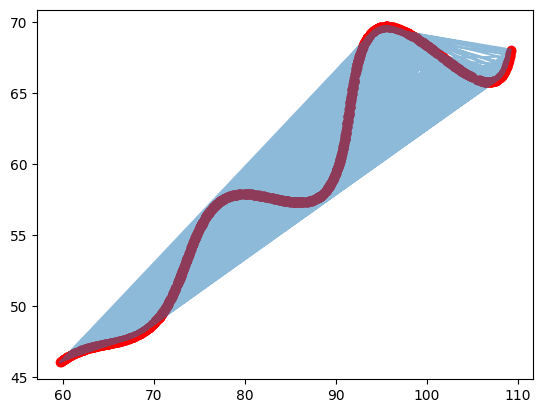

In [4]:
plt.plot(x,y,alpha = 0.5)
plt.scatter(x,y,color = "red")

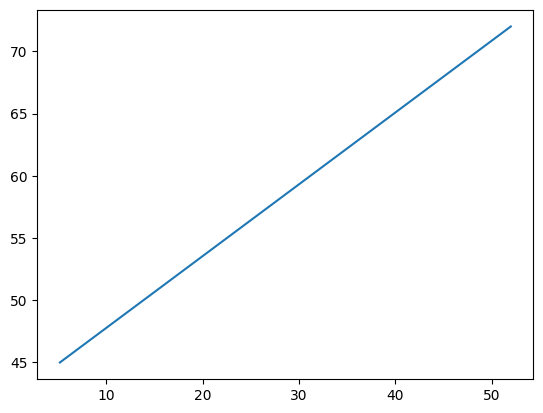

In [5]:
plt.plot(t*np.cos(np.deg2rad(30)) ,42 + t*np.sin(np.deg2rad(30)) )

In [6]:
# Initial tinkering. will follow up with a grid search


# Gridsearch
Conlcusions:
- L1 of 25 is high
- I feel like theta is pretty spot on or close.
- Need to still work on M,X
- Tried a finer gridsearch using prev results. Not much imporvement
θ = 28.125
M = 0.021400000000000006
X = 54.9
min L1 25.24340278201307

In [7]:
def curve(t, theta_deg, M, X):
    theta = np.deg2rad(theta_deg)
    exp_term = np.exp(M * np.abs(t))
    x_pred = t * np.cos(theta) - exp_term * np.sin(0.3 * t) * np.sin(theta) + X
    y_pred = 42 + t * np.sin(theta) + exp_term * np.sin(0.3 * t) * np.cos(theta)
    return x_pred, y_pred

# theta_grid = np.linspace(0, 50, 51)    
# M_grid = np.linspace(-0.05, 0.05, 21)    
# X_grid = np.linspace(0, 100, 21)         

theta_grid = np.linspace(28.0 - 1, 28.0 + 1, 81)
M_grid     = np.linspace(0.020000000000000004 - 0.002, 0.020000000000000004 + 0.002, 81)
X_grid     = np.linspace(55.0 - 1, 55.0 + 1, 81)

best_loss = float("inf")
best_params = None

for theta in theta_grid:
    for M in M_grid:
        for X in X_grid:
            x_pred, y_pred = curve(t, theta, M, X)
            loss = np.mean(np.abs(x - x_pred) + np.abs(y - y_pred))
            if loss < best_loss:
                best_loss = loss
                best_params = (theta, M, X)


print(f"θ = {best_params[0]}")
print(f"M = {best_params[1]}")
print(f"X = {best_params[2]}")
print(f"min L1 {best_loss}")

θ = 28.125
M = 0.021400000000000006
X = 54.9
min L1 25.24340278201307


# Minimization using grid search output.

In [9]:
def objective(params):
    theta, M, X = params
    x_pred, y_pred = curve(t, theta, M, X)
    return np.mean(np.abs(x - x_pred) + np.abs(y - y_pred))  

initial_guess = [28.125, 0.0214, 54.9]
bounds = [(0, 50), (-0.05, 0.05), (0, 100)]

In [10]:
result_powell = minimize(
    objective,
    initial_guess,
    method='Powell',
    bounds=bounds,
    options={'maxiter': 10000, 'xtol': 1e-6, 'ftol': 1e-6, 'disp': True}
)
print("θ  : ", result_powell.x[0])
print("M  : ", result_powell.x[1])
print("X  : ", result_powell.x[2])
print("Min L1 : ", result_powell.fun)

Optimization terminated successfully.
         Current function value: 25.243398
         Iterations: 1
         Function evaluations: 85
θ  :  28.120418061041402
M  :  0.021399674857236456
X  :  54.900061696638645
Min L1 :  25.24339796943881


In [11]:
result_nelder = minimize(
    objective,
    initial_guess,
    method='Nelder-Mead',
    options={'maxiter': 10000, 'xatol': 1e-6, 'fatol': 1e-6, 'disp': True}
)

print("θ  : ", result_nelder.x[0])
print("M  : ", result_nelder.x[1])
print("X  : ", result_nelder.x[2])
print("Min L1 : ", result_nelder.fun)

Optimization terminated successfully.
         Current function value: 25.243396
         Iterations: 93
         Function evaluations: 172
θ  :  28.11842300222184
M  :  0.021388957351028685
X  :  54.9003484203334
Min L1 :  25.243395891701628


# Global minima using differential evolution

In [ ]:
result_de = differential_evolution(
    objective,
    bounds=bounds,
    maxiter=2000,       
    tol=1e-6,
    polish=False,        
    disp=True
)

print("\n--- Differential Evolution (Global) ---")
print(f"θ = {result_de.x[0]}")
print(f"M = {result_de.x[1]}")
print(f"X = {result_de.x[2]}")
print(f"Min L1 = {result_de.fun}")


differential_evolution step 1: f(x)= 25.40806634218797
differential_evolution step 2: f(x)= 25.40806634218797
differential_evolution step 3: f(x)= 25.387532797617585
differential_evolution step 4: f(x)= 25.33342973010111
differential_evolution step 5: f(x)= 25.33342973010111
differential_evolution step 6: f(x)= 25.276279473456082
differential_evolution step 7: f(x)= 25.273795381341817
differential_evolution step 8: f(x)= 25.262946376620658
differential_evolution step 9: f(x)= 25.25106858875421
differential_evolution step 10: f(x)= 25.24736951504348
differential_evolution step 11: f(x)= 25.245217313385655
differential_evolution step 12: f(x)= 25.245217313385655
differential_evolution step 13: f(x)= 25.244957654114348
differential_evolution step 14: f(x)= 25.244957654114348
differential_evolution step 15: f(x)= 25.244021309839447
differential_evolution step 16: f(x)= 25.243988458239702
differential_evolution step 17: f(x)= 25.243740999651024
differential_evolution step 18: f(x)= 25.24374

# Fit plot

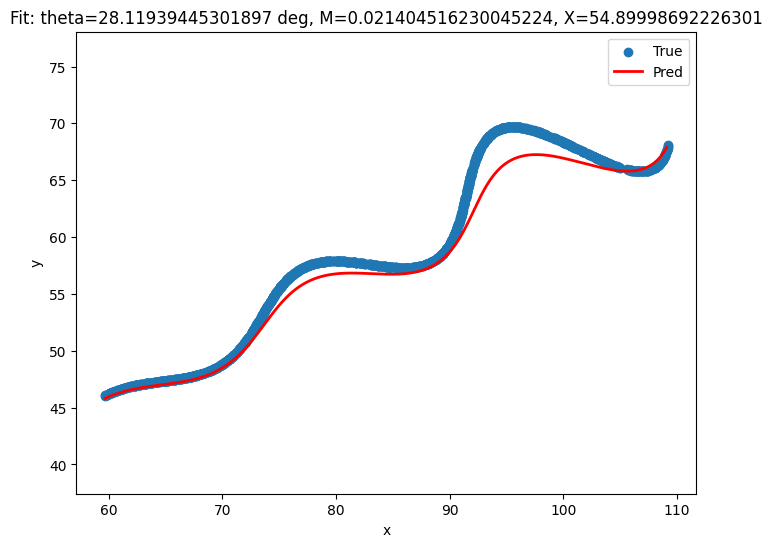

In [37]:
x_fit, y_fit = curve(t,28.11939445301897,0.021404516230045224,54.89998692226301)
plt.figure(figsize=(8,6))
plt.scatter(x, y, label='True')
plt.plot(x_fit, y_fit, '-', linewidth=2, label='Pred',color = "red")
plt.axis('equal')
plt.legend()
plt.xlabel('x'); plt.ylabel('y')
plt.title(f"Fit: theta=28.11939445301897 deg, M=0.021404516230045224, X=54.89998692226301")

plt.show()